# Mount Google Drive
Mount Drive agar Google Collaboratory dapat mengakses Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Import Package yang digunakan

In [0]:
!pip install sastrawi
!pip install seaborn

     |████████████████████████████████| 215kB 24.2MB/s 


In [0]:
!pip install seaborn

In [0]:
#Twitter API
import tweepy
from tweepy import OAuthHandler
import pandas as pd

In [0]:
#Preprocess
import re #Regular Expression

#Stemming
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from tqdm import tqdm_notebook as tqdm

import operator

In [0]:
#Bernoulli Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

In [0]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

# Crawling Data

In [0]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd

In [0]:
#Twitter Account 1
ACCESS_TOKEN = "176615700-wSbCidGlmETeksC32gToqtOWNq2dUt0ctO78w3Jt"
ACCESS_TOKEN_SECRET = "gW8H3unFKSBNXIQYUEmeOZOPyR0y6QQZOSQslb971Zteo"
CONSUMER_KEY = "7j7ET0pEx2eWP1Cw49ATlfmPp"
CONSUMER_SECRET = "Qh1IKdxBmuvwQwcV1nxp9Yupvib5pKwWGc9BR2CTANBFLgI3kP"

In [0]:
#Twitter Account 2
ACCESS_TOKEN = "402583840-cBtnpI8W3qaTQz433Ce2xyjhNpWU5g2iEgvsCwMJ"
ACCESS_TOKEN_SECRET = "6UgCrN33piYDJn7KsJm7rWPWXhH9MA8NP0RA6RhFFDUba "
CONSUMER_KEY = "ZBkgr0g97eU8BmB5RO3yaksVq"
CONSUMER_SECRET = "41TuqnINU9r20xtDYh7d55PzZYsu1hxEykt03hVtDRgOFjsBvm"

In [0]:
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=False)

In [0]:
#Start Data Mining using Twitter API
tweet_fulltext = []
searchquery = 'krl'
for tweets in tweepy.Cursor(api.search, q=searchquery, count=5000, lang='id', tweet_mode='extended').items():
  if tweets.full_text not in tweet_fulltext:
    tweet_fulltext.append(tweets.full_text)
df = pd.DataFrame()
df['tweets'] = tweet_fulltext
print(df.shape)

(26, 1)


In [0]:
df.head()

,tweets
0,dear @IndosatCare knp sinyal sy digangguin mel...
1,RT @kang_anu: @barijoe Ekonomis kendaraan umum...
2,"@barijoe Ekonomis kendaraan umum. Cuma, mesti ..."
3,"Sampai siang tadi, rasanya masih nyesek, pusin..."
4,Hampir setiap hari ke kantor naik KRL. Seringn...


In [0]:
#Export dataframe consisting Raw Data Tweets to csv file and save it to Google Drive

!mv data_comut.csv /content/gdrive/My\ Drive/skripsi2019/datanew/data_comut.csv

In [0]:
df.to_csv('data_comut.csv')

# Pre Processing

In [0]:
import pandas as pd
import re

In [0]:
#Load Raw Data Tweets from Google Drive
df = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/data_tweetscoba.csv') 

##Case Folding

In [0]:
df['tweets']=df['tweets'].str.lower()

In [0]:
#See n data from top dataframe tweets from Dataframe
df.head(100)

,tweets
0,gangguan double double track toh krl. dan aku ...
1,@commuterline min tolong ac panas di krl 204-4...
2,@commuterline jangan menghambat perjalanan yan...
3,"@commuterline jaman sudah maju, teknologi suda..."
4,dijalan nih bentar ya lagi ketahan di manggara...
5,halo. waktu yang ketahan untuk masuk manggarai...
6,halo tolong dijawab jangan make template ya. w...
7,@commuterline krl serpong menuju tanahabang ke...
8,@askmenfess sebenernya krl tuh ramenya dari ta...
9,@capriyani @commuterline aduh.... 😭 ka nya mas...


In [0]:
#Save Casefolded tweets in Google Drive as csv file.
df.to_csv('casefolding_tweets.csv', index=None)
!mv casefolding_tweets.csv /content/gdrive/My\ Drive/skripsi2019/prepro/casefolding_tweets.csv

##Filtering


In [0]:
#drop symbol,RT,@,http, in tweets
df = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/casefolding_tweets.csv') 

In [0]:
df['tweets']=df['tweets'].str.replace('(https?://[\w\.\/]*)', '') #http
df['tweets']=df['tweets'].str.replace('(?:&(?:lt|nbsp|amp|gt);)', '') #lt,nbsp,gt,amp
df['tweets']=df['tweets'].str.replace('(@|#)\w+', '') #@ dan #
df['tweets']=df['tweets'].str.replace('[^A-Za-z0-9\s\-\/]', '') #selain huruf, spasi dan strip
df['tweets']=df['tweets'].str.replace('(\-|\/)', ' ') #-
df['tweets']=df['tweets'].str.replace('\n', ' ') # enter
df['tweets']=df['tweets'].str.replace('\s{2,}', ' ') # spasi lebih dari 2
df['tweets']=df['tweets'].str.replace('^rt.*', '') #Remove RT Tweets
df['tweets']=df['tweets'].str.replace("\.\.", " ")
df.dropna(subset=['tweets'], inplace=True) #Remove Empty cell
df = df.drop_duplicates() #Remove Duplicate Tweet

In [0]:
df.head(100)

,tweets
0,gangguan double double track toh krl dan aku m...
1,min tolong ac panas di krl 204 48 k 1 19164 j...
2,jangan menghambat perjalanan yang enggak jela...
3,jaman sudah maju teknologi sudah berkembang n...
4,dijalan nih bentar ya lagi ketahan di manggara...
5,halo waktu yang ketahan untuk masuk manggarai ...
6,halo tolong dijawab jangan make template ya wa...
7,krl serpong menuju tanahabang kenapa ketahan ...
8,sebenernya krl tuh ramenya dari tanahabang su...
9,aduh ka nya masih jauh tapi krl udah ditahan ...


In [0]:
df.to_csv('filtering_tweets.csv', index=None)
!mv filtering_tweets.csv /content/gdrive/My\ Drive/skripsi2019/prepro/filtering_tweets.csv

## Stemming dan Stopword using Sastrawi

In [0]:
!pip install sastrawi


     |████████████████████████████████| 215kB 9.5MB/s 


In [0]:
import numpy as np
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm_notebook as tqdm

In [0]:
df = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/filtering_tweets.csv')

In [0]:
stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

In [0]:
def stopwords(data):
  data = stopword.remove(data)
  return data

In [0]:
#Function untuk membersihkan tweet yang telah di filter
def clean_text(data):
  data = re.sub(r'\bmalas\b', 'males', data)
  data = re.sub(r'\bgue\b|\bgua\b|\bw\b|\baku\b|\bku\b|\bgw\b|\beug\b|\bsy\b|\bacu\b', 'saya', data)
  data = re.sub(r'\bst\b|\bstsiun\b|\bsta\b', 'stasiun', data)
  data = re.sub(r'\bsmpe\b', 'sampai', data)
  data = re.sub(r'\bbpk\b', 'bapak', data)
  data = re.sub(r'\btks\b|\bthanks\b|\btengkyu\b', 'makasih', data)
  data = re.sub(r'\byg\b', 'yang', data)
  data = re.sub(r'\bjlr\b', 'jalur', data)
  data = re.sub(r'\bhuft\b', 'parah', data)
  data = re.sub(r'\bzonk\b', 'jelek', data)
  data = re.sub(r'\bpkl\b|\bpukul\b', '', data)
  data = re.sub(r'\bgua\b|\bgue\b|\bw\b|\bgw\b', 'saya', data)
  data = re.sub(r'\bselamat\b', '', data)
  data = re.sub(r'\bmakasih\b', '', data)
  data = re.sub(r'\byg\b', 'yang', data)
  data = re.sub(r'\bmandek\b', 'ketahan', data)
  data = re.sub(r'\bzonk\b', 'jelek', data)
  data = re.sub(r'\bga\b|\bgak\b|\bengga\b', 'enggak', data)
  data = re.sub(r'\bpeople\b', 'orang', data)
  data = re.sub(r'\bnjir\b', 'anjing', data)
  data = re.sub(r'\bDDT\b|\bddt\b', 'double double track', data)
  data = re.sub(r'\bkzl\b|\bkesal\b', 'kesel', data)
  data = data.split()
  data = ' '.join(data)
 
  data = stopword.remove(data)
  data = stemmer.stem(data)
  return data

In [0]:
#Menyimpan tweet yang telah dibersihkan ke dataframe df dan disimpan pada kolom 'clean_text'
df['stopwords'] = [stopwords(n) for n in tqdm(df.tweets)]
df['clean_text'] = [clean_text(n) for n in tqdm(df.tweets)]

not_null_row = [i for i in df.index if len(df.loc[i]['clean_text']) > 0]
df = df.loc[not_null_row]
# print(df.shape)
df.head()
df.to_csv('stop_stemmed_tweets.csv')

In [0]:
df.head()

,tweets,stopwords,clean_text
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...


In [0]:
# df['clean_text'] = [clean_text(n) for n in tqdm(df.tweets)]

# not_null_row = [i for i in df.index if len(df.loc[i]['clean_text']) > 0]
# df = df.loc[not_null_row]
# print(df.shape)
# df.head()

In [0]:
df.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/stop_stemmed_tweets.csv')

# Most word in dataset

In [0]:
df = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/stop_stemmed_tweets.csv')

In [0]:
import operator
import matplotlib.pyplot as plt

In [0]:
words = {}

In [0]:
batch = 500
for per_batch in range(len(df)//500):
  for word in ' '.join(df.iloc[batch * per_batch : batch * per_batch + batch].clean_text).split(' '):
    if word not in words.keys():
      words[word] = 1
    else:
      words[word] += 1

In [0]:
sorted_words = sorted(words.items(), key=operator.itemgetter(1))

In [0]:
top20_word =pd.DataFrame(sorted_words[len(sorted_words)-20:len(sorted_words)], columns =["Kata", "Jumlah"])
top20_word.head(20)

,Kata,Jumlah
0,berapa,594
1,lama,610
2,tahan,616
3,akhir,641
4,pagi,661
5,aja,673
6,rute,674
7,malam,714
8,mau,724
9,sedia,732


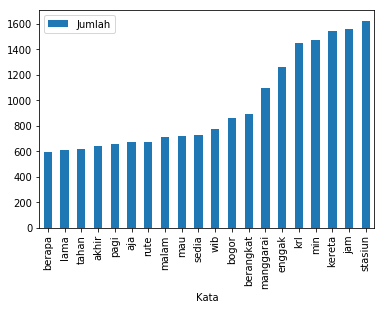

In [0]:
top20_word.plot(kind='bar', x='Kata', y='Jumlah')
plt.savefig('top20kata.png', bbox_inches='tight')
plt.savefig('kemunculan_kata.jpg', bbox_inches='tight')
plt.show()

# Labelling Corpus

In [0]:
df = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/stop_stemmed_tweets.csv', index_col=0)

In [0]:
df.head()

,tweets,stopwords,clean_text
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...


In [0]:
# load positive word
positive = pd.read_csv('/content/gdrive/My Drive/skripsi2019/positive-words.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)
# load negative word
negative = pd.read_csv('/content/gdrive/My Drive/skripsi2019/negative-words.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [0]:
df['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df.clean_text]
df['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df.clean_text]

In [0]:
df.head()

,tweets,stopwords,clean_text,positive,negative
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa,0.000000,0.285714
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...,0.130435,0.260870
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...,0.133333,0.400000
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...,0.250000,0.312500
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...,0.000000,0.300000


In [0]:
df['sentimen'] = ['positive' if df.iloc[i].positive >= df.iloc[i].negative else 'negative' for i in range(df.shape[0])]

In [0]:
df.head()

,tweets,stopwords,clean_text,positive,negative,sentimen
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa,0.000000,0.285714,negative
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...,0.130435,0.260870,negative
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...,0.133333,0.400000,negative
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...,0.250000,0.312500,negative
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...,0.000000,0.300000,negative


## Grafik Labeling Corpus

In [0]:
print('jumlah tweet positif : ', df[(df.sentimen == 'positive')].shape[0])
print('jumlah tweet negatif : ', df[(df.sentimen == 'negative')].shape[0])

jumlah tweet positif :  5276
jumlah tweet negatif :  2854


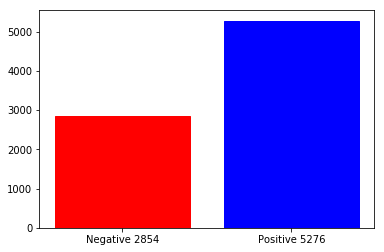

In [0]:
import matplotlib.pyplot as plt

total_negative_tweets = df[(df.sentimen == 'negative')].shape[0]
total_positive_tweets = df[(df.sentimen == 'positive')].shape[0]
total_tweets = df.shape[0]

df_bar = pd.Series(data=[total_negative_tweets, total_positive_tweets],
               index=['Negative ' + str(total_negative_tweets), 
                      'Positive ' + str(total_positive_tweets)])

barnya = plt.bar(df_bar.index, df_bar.values)
barnya[0].set_color('#ff0000')
barnya[1].set_color('#0000ff')
plt.savefig('manual_label_bar.jpg')
plt.show()

(-1.1173112380823964,
 1.200877205073429,
 -1.1586584782712417,
 1.102793260870059)

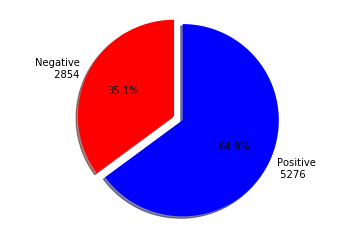

In [0]:
fig1, ax1 = plt.subplots()
ax1.pie([total_negative_tweets/total_tweets, total_positive_tweets/total_tweets], 
        explode=[0, 0.1], labels=['Negative\n {}'.format(total_negative_tweets), 'Positive\n {}'.format(total_positive_tweets)], autopct='%1.1f%%',
        colors=['#ff0000', '#0000ff'], shadow=True, startangle=90)
plt.savefig('manual_label_pie.jpg')
ax1.axis('equal')

In [0]:
df.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/hasil_manual_labeling.csv')

# Bag of Word (BOW) Model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/skripsi2019/prepro/hasil_manual_labeling.csv', index_col = 0)

In [0]:
df['numbered_sentimen'] = [1 if i == 'positive' else 0 for i in df['sentimen']]

In [0]:
df.head(10)

,tweets,stopwords,clean_text,positive,negative,sentimen,numbered_sentimen
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa,0.000000,0.285714,negative,0
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...,0.130435,0.260870,negative,0
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...,0.133333,0.400000,negative,0
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...,0.250000,0.312500,negative,0
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...,0.000000,0.300000,negative,0
5,halo waktu yang ketahan untuk masuk manggarai ...,halo waktu ketahan masuk manggarai berapa lama,halo waktu tahan masuk manggarai berapa lama,0.000000,0.285714,negative,0
6,halo tolong dijawab jangan make template ya wa...,halo dijawab jangan make template waktu yg ket...,halo jawab jangan make template waktu tahan ma...,0.000000,0.181818,negative,0
7,krl serpong menuju tanahabang kenapa ketahan d...,krl serpong menuju tanahabang ketahan mesin ac...,krl serpong tuju tanahabang tahan mesin ac ker...,0.125000,0.375000,negative,0
8,sebenernya krl tuh ramenya dari tanahabang sud...,sebenernya krl tuh ramenya tanahabang sudirman...,sebenernya krl tuh ramenya tanahabang sudirman...,0.086957,0.130435,negative,0
9,aduh ka nya masih jauh tapi krl udah ditahan b...,aduh ka nya jauh krl udah ditahan berapa ratus...,aduh ka nya jauh krl udah tahan berapa ratus o...,0.000000,0.285714,negative,0


In [0]:
bow_model = CountVectorizer(ngram_range=(1,2), min_df=0.0025)
bow_model.fit(df.clean_text)
df_vect = pd.DataFrame(bow_model.transform(df.clean_text).toarray(), columns=bow_model.get_feature_names())
print(df_vect.shape)
df_vect.head(10)

(8130, 985)


,10,10 menit,11,12,15,15 menit,1700,1800,20,20 km,20 menit,30,30 menit,abang,abang berangkat,abang jam,abang sedia,abis,ac,access,ada,ada awat,ada ganti,admin,aduh,aja,aja min,akan,akhir,akhir jam,akhir krl,akhir sedia,akhir stasiun,akun,alami,alami ganti,alami selisih,alas,alhamdulillah,alir,...,turun,turun stasiun,tutup,twitter,uang,ubah,uda,udah,udh,ui,uji,ulang,umum,unduh,untuk,untung,up,usah,usaha,utama,utk,vending,via,via pasar,waktu,waktu yang,wanita,warga,wesel,wib,wib rute,wkwk,wkwkwk,ya,yaa,yah,yak,yang,yang jadwal,you
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.iloc[1].clean_text

'min ac panas krl 204 48 k 1 19164 jurus maja jam 1636 pintu 5a 5b krl sesak penuh aduh parah banget deh'

In [0]:
print(bow_model.get_feature_names())

['10', '10 menit', '11', '12', '15', '15 menit', '1700', '1800', '20', '20 km', '20 menit', '30', '30 menit', 'abang', 'abang berangkat', 'abang jam', 'abang sedia', 'abis', 'ac', 'access', 'ada', 'ada awat', 'ada ganti', 'admin', 'aduh', 'aja', 'aja min', 'akan', 'akhir', 'akhir jam', 'akhir krl', 'akhir sedia', 'akhir stasiun', 'akun', 'alami', 'alami ganti', 'alami selisih', 'alas', 'alhamdulillah', 'alir', 'allah', 'aman', 'aman lintas', 'ambil', 'ampe', 'anak', 'angke', 'angkot', 'angkut', 'angkut kereta', 'anjing', 'antri', 'apa', 'apabila', 'aplikasi', 'aplikasi krl', 'arah', 'arah bogor', 'arti', 'asa', 'asal', 'atas', 'atas informasi', 'atas kritik', 'atas saran', 'atur', 'awal', 'awal stasiun', 'awat', 'awat prasarana', 'baca', 'bagai', 'bagaimana', 'bagus', 'bahan', 'bahan evaluasi', 'baik', 'baik layan', 'bakal', 'balik', 'bandan', 'bandara', 'bang', 'banget', 'bangsat', 'bangun', 'bank', 'bantu', 'banyak', 'bapak', 'barang', 'barang tinggal', 'barat', 'baru', 'batas', 'bau

##Positive Negative - Vector

In [0]:
df_vect['rate_positive_word'] = [i for i in df['positive']]
df_vect['rate_negative_word'] = [i for i in df['negative']]
df_vect.head()

,10,10 menit,11,12,15,15 menit,1700,1800,20,20 km,20 menit,30,30 menit,abang,abang berangkat,abang jam,abang sedia,abis,ac,access,ada,ada awat,ada ganti,admin,aduh,aja,aja min,akan,akhir,akhir jam,akhir krl,akhir sedia,akhir stasiun,akun,alami,alami ganti,alami selisih,alas,alhamdulillah,alir,...,tutup,twitter,uang,ubah,uda,udah,udh,ui,uji,ulang,umum,unduh,untuk,untung,up,usah,usaha,utama,utk,vending,via,via pasar,waktu,waktu yang,wanita,warga,wesel,wib,wib rute,wkwk,wkwkwk,ya,yaa,yah,yak,yang,yang jadwal,you,rate_positive_word,rate_negative_word
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.285714
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.130435,0.260870
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.133333,0.400000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.250000,0.312500
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.300000


# Bernoulli Naive Bayes Model Train


In [0]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_vect, df.numbered_sentimen, test_size=0.2,random_state=123)

In [0]:
test_x = pd.DataFrame(x_test)
test_y = pd.DataFrame(y_test)
test_x.shape[0]

1626

In [0]:
#Buat model Bernoulli
model = BernoulliNB()

#Start Training
classifier = model.fit(x_train,y_train)

##Confusion Matrix Data Latih

In [0]:
predict = classifier.predict(x_train)
(predict, y_train)
print(classification_report(predict, y_train))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      2690
           1       0.85      0.94      0.89      3814

    accuracy                           0.86      6504
   macro avg       0.87      0.85      0.86      6504
weighted avg       0.87      0.86      0.86      6504



In [0]:
#Confusion Matrix Training
cm_train = confusion_matrix(predict,y_train)
print(cm_train)

[[2040  650]
 [ 237 3577]]


In [0]:
accuracy = cm_train.trace()/cm_train.sum()
print (accuracy)
print(f"{(accuracy*100):3.2f}%")

0.8636223862238622
86.36%


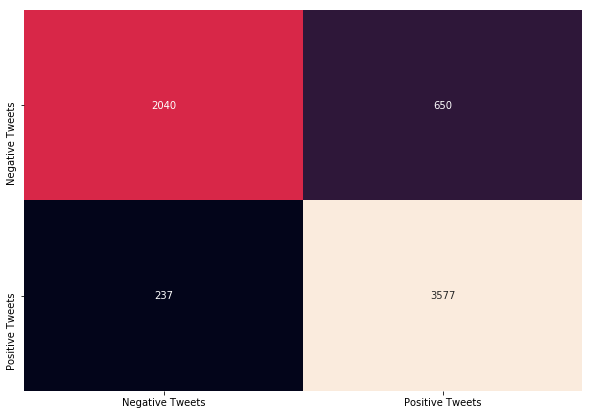

In [0]:
df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["Negative Tweets", "Positive Tweets"]],
columns = [i for i in ["Negative Tweets", "Positive Tweets"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_train, annot=True, cbar=False, fmt="d")
plt.savefig('confusion_matrix_train.jpg')

## Confusion Matrix Data Validasi

In [0]:
predict = classifier.predict(x_test)
classification_report(predict, y_test)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       697
           1       0.83      0.94      0.88       929

    accuracy                           0.86      1626
   macro avg       0.87      0.84      0.85      1626
weighted avg       0.86      0.86      0.85      1626



In [0]:
#Confusion Matrix Testing
cm = confusion_matrix(predict,y_test)
print(cm)


[[521 176]
 [ 56 873]]


In [0]:
predict = classifier.predict(x_test)
classification_report(predict, y_test)
accuracy = cm.trace()/cm.sum()
print (accuracy)
print(f"{(accuracy*100):3.2f}%")

0.8573185731857319
85.73%


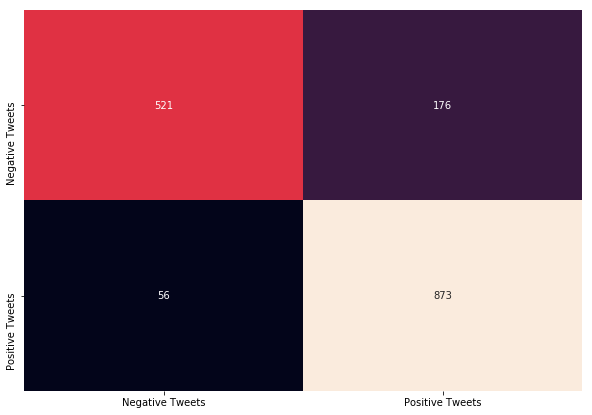

In [0]:
df_cm = pd.DataFrame(cm, index = [i for i in ["Negative Tweets", "Positive Tweets"]],
columns = [i for i in ["Negative Tweets", "Positive Tweets"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cbar=False, fmt="d")
plt.savefig('confusion_matrix.jpg')

In [0]:
rd_test = pd.DataFrame(columns = ["tweets","positive","negative","target","prediksi"])
rd_test.head()

,tweets,positive,negative,target,prediksi


In [0]:
df.head()

,tweets,stopwords,clean_text,positive,negative,sentimen,numbered_sentimen
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa,0.000000,0.285714,negative,0
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...,0.130435,0.260870,negative,0
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...,0.133333,0.400000,negative,0
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...,0.250000,0.312500,negative,0
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...,0.000000,0.300000,negative,0


In [0]:
i = 0
for val in test_x.index:
  rd_test.loc[i] = [df['clean_text'].iloc[val],  df['positive'].iloc[val], df['negative'].iloc[val],df['numbered_sentimen'].iloc[val], predict[i]]
  i = i+1

In [0]:
rd_test.head(10)

,tweets,positive,negative,target,prediksi
0,keluh tiap pagi jebak antara tebet manggarai l...,0.052632,0.157895,0,0
1,info min kalo bintaro naik kereta jurus drmn p...,0.000000,0.090909,0,0
2,min dibales minnn,0.333333,0.000000,1,1
3,iyaaa kaya antri gitu masuk manggarai masuk ja...,0.071429,0.214286,0,0
4,rute duri tangerang sedia berangkat 0515 0545 ...,0.133333,0.066667,1,1
5,hiyaaaaaat telat baca tau gt naik bis ajah bia...,0.000000,0.090909,0,0
6,udah panas aroma sengat,0.250000,0.250000,1,0
7,double double track kan blm manggarai yaa otom...,0.066667,0.200000,0,0
8,ciri2 tumpang sebal komuter 1 maksa duduk nyem...,0.083333,0.083333,1,0
9,mau nanya jurus palm merah rawa buntu kereta b...,0.090909,0.090909,1,1


In [0]:
# Export
rd_test.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/perbandinganklasifikasi_web.csv')

In [0]:
predict_counter = 0
for val in test_x.index:
  print('{}, {}, {}'.format(df['clean_text'].iloc[val], df['numbered_sentimen'].iloc[val], predict[predict_counter]))
  predict_counter+=1
print(predict_counter)

keluh tiap pagi jebak antara tebet manggarai lambat kantor udah berangkat pagi sama aja iya tau gaji enggak berapa, 0, 0
info min kalo bintaro naik kereta jurus drmn posisi klp gading, 0, 0
min dibales minnn, 1, 1
iyaaa kaya antri gitu masuk manggarai masuk jatinegara tahan masuk cakung tahan gt terus, 0, 0
rute duri tangerang sedia berangkat 0515 0545 0615 0645 0655 0715 0745 0755 0815 wib, 1, 1
hiyaaaaaat telat baca tau gt naik bis ajah biar bayar 35rb, 0, 0
udah panas aroma sengat, 1, 0
double double track kan blm manggarai yaa otomatis masuk keluar jatinegara tunggu aman manggarai dulu, 0, 0
ciri2 tumpang sebal komuter 1 maksa duduk nyempil padahal kursi jelas2 dah penuh 2 duduk sambung gerbong 3 geng kereta berisik kayak pasar malam, 1, 0
mau nanya jurus palm merah rawa buntu kereta berapa berapa jam, 1, 1
masinis suka iklan kartu tinggal tap n go, 1, 1
min issue apa kok td kereta masuk bogor telat trs sekarang tahan tahan dr pasar minggu, 0, 0
nyari jawab copy paste 20 km h nya e

## Grafik Prediksi Model Bernoulli

In [0]:
#Prediksi Bernoulli dengan BOW(df_vect)
result = model.predict(df_vect)

In [0]:
print('jumlah positif : ', len([n for n in result if n == 1]))
print('jumlah negatif : ', len([n for n in result if n == 0]))

jumlah positif :  4743
jumlah negatif :  3387


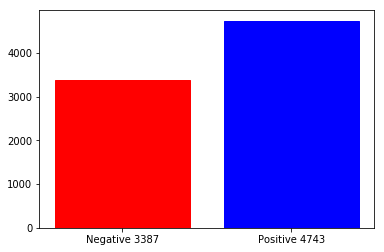

In [0]:
#Barplot
model_total_neg = len([n for n in result if n == 0])
model_total_pos = len([n for n in result if n == 1])
model_total_tweets = model_total_neg + model_total_pos


model_df = pd.Series(data=[model_total_neg, model_total_pos],
               index=['Negative ' + str(model_total_neg), 
                      'Positive ' + str(model_total_pos)])

barnya = plt.bar(model_df.index, model_df.values)
barnya[0].set_color('#ff0000')
barnya[1].set_color('#0000ff')
plt.savefig('ai_label_bar.jpg')
plt.show()

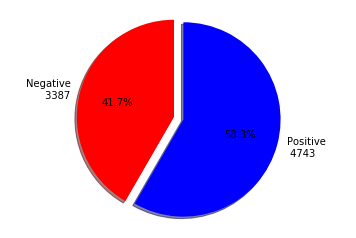

In [0]:
#Piechart
fig1, ax1 = plt.subplots()
ax1.pie([model_total_neg/model_total_tweets, model_total_pos/model_total_tweets], 
        explode=[0, 0.1], labels=['Negative\n {}'.format(model_total_neg), 'Positive\n {}'.format(model_total_pos)], autopct='%1.1f%%',
        colors=['#ff0000', '#0000ff'], shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('ai_label_pie.jpg')

#Perbandingan Klasifikasi
Membandingan hasil klasifikasi secara manual dengan klasifikasi menggunakan Naive Bayes dengan model Bernoulli

In [0]:
df['ai_predict'] = result
df['sentiment_ai'] = ['positive' if df.iloc[i].ai_predict == 1 else 'negative' for i in range(df.shape[0])]
df.head()

,tweets,stopwords,clean_text,positive,negative,sentimen,numbered_sentimen,ai_predict,sentiment_ai
0,gangguan double double track toh krl dan aku m...,gangguan double double track krl aku merasakan,ganggu double double track krl saya rasa,0.000000,0.285714,negative,0,0,negative
1,min tolong ac panas di krl 204 48 k 1 19164 ju...,min ac panas krl 204 48 k 1 19164 jurusan maja...,min ac panas krl 204 48 k 1 19164 jurus maja j...,0.130435,0.260870,negative,0,0,negative
2,jangan menghambat perjalanan yang enggak jelas...,jangan menghambat perjalanan enggak jelas krl ...,jangan hambat jalan enggak jelas krl panas eng...,0.133333,0.400000,negative,0,0,negative
3,jaman sudah maju teknologi sudah berkembang na...,jaman maju teknologi berkembang krl bogor jaka...,jaman maju teknologi kembang krl bogor jakarta...,0.250000,0.312500,negative,0,0,negative
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar lagi ketahan manggarai gang...,jalan nih bentar lagi tahan manggarai ganggu t...,0.000000,0.300000,negative,0,0,negative


In [0]:
df.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/full_labelling.csv')

#Wordcloud

In [0]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np

In [0]:
try:
  del df_vect['rate_positive_word']
  del df_vect['rate_negative_word']
except:
  pass

In [0]:
text = []
dict_text = {}

for x in df_vect.columns:
  text += [x] * sum(df_vect[x])

print(text)
text = '  '.join(text)

for x in df_vect.columns:
  dict_text[x] = (sum(df_vect[x]) / len(text)) / 100

['10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '10 menit', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12

In [0]:
mask = np.array(Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Disk_pack1.svg/1200px-Disk_pack1.svg.png', stream=True).raw))

In [0]:
wordcloud = WordCloud(background_color='white', collocations=False, mask=mask, contour_width=3, contour_color='firebrick').generate(text)

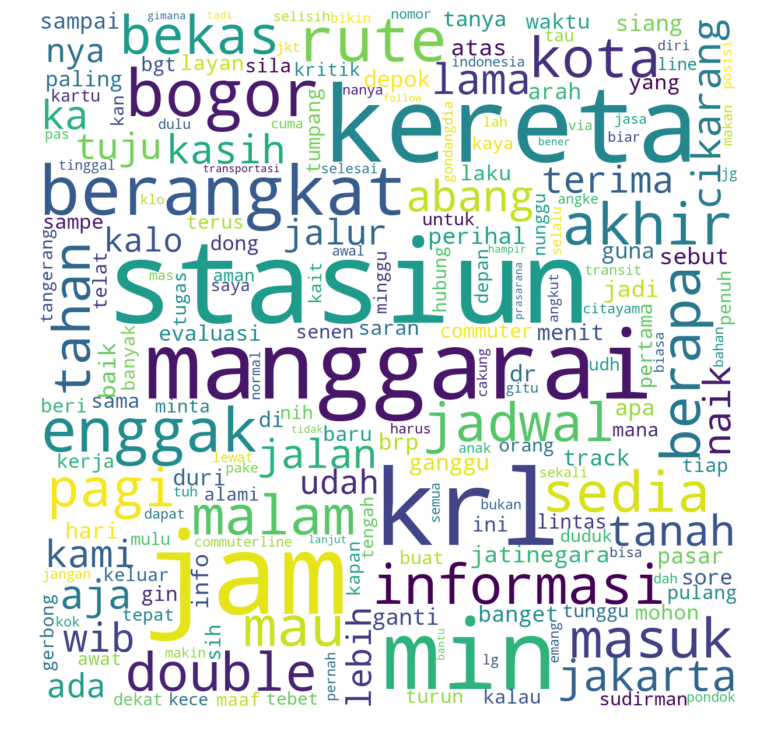

In [0]:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud.jpg')
plt.show()

# Bernoulli Predict
Menggunakan kalimat baru

In [0]:
data_predict = [
    'KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGGAk NGASIH TAU KERETA YANG DATANG BERAPA RANGKAIAN?!! SESUSAH ITU YA CUMA NGASIH TAU DOANG T*I BAT CAPE ORG LARI-LARI @CommuterLine @CurhatKRL',
    'Baru bangun di krl dong nyaman bgt aku tuh tidur di krl gini adem gmn gtu sampe pgn bawa guling',
    'krl ketahan nih masuk manggarai',
    '@CommuterLine min, ini krl bekasi knp telat ya? Td pagi jg, apa double double track nya ga ngaruh ya... https://t.co/DbYJK3oyVm',
    '@CommuterLine min kenapa kereta tangerang panas bgt ya. Kayaknya AC nya gak dingin deh. No 8510 k1 1 89 64',
    'Naik krl pagi jam setengah 6 tuh nikmat bgt liat pemandangan stasiun-stasiun. Mana warna langit nya lagi bagus gtu, jd keliatan estetik stasiun nya kaya preset2 lightroom wkwkwk',
    'ketahan gambir menit ketahan masuk jatinegara udah menit masih lanjut duhh udah bisa ngomong apa lah ama org ngatur jadwal krl',
    'bau ketek di krl aduh pusing jadi mual',
    'Ya mudah2an nggak ada apa2 seterusnya spt ini biar KRL lbh nyaman manusiawi #krlhariini',
    'Dari 06.58 WIB, sampai pukul 07.34 WIB KRL arah Bekasi belum tersedia. Masya Allah lama sekali keretanya. @CommuterLine',
    'aduh penuh banget gerbong krl gara2 lama datengnya nih krl',
    'Mantap Bojongku 👏🏻 krl jakarta emang selalu top https://t.co/Zqg3ZO5PA5',
    'Pagi ini ngurangin tingkat polusi Jakarta dengan naik @CommuterLine #ayonaikkereta https://t.co/7vmLLeZL3P https://t.co/uZPzADrmx5',
    '@CommuterLine min, apa faedahnya jalur DDT buat penumpang KRL, toh tetap ditahan dan nggak pernah lebih cepat sampai tujuan',
    '@CommuterLine min , AC d krl bogor angke yg keberangkatan jam 6, ga dingin.. Bukan AC ini mah, tp kipas.. tolonglah dibenerin,ini krlnya cm 8 gerbong cui, panas dan padat bgt neh..',
    '@CommuterLine halo min, mohon info jadwal CL dr Cikarang ke jkt antara jam 10-11 pagi. Trims',
    '@gebitobing Selamat malam, rute Jatinegara-Manggarai tersedia pkl. 23:17 WIB, tks.',
    'YaAllah gua harus sesabar apa ngadepin krl telat telat kaya gini :)))))',
    '@CommuterLine krl sekarang gabisa di andelin banget dari jadwal berubah rubah, telat, gangguan apalah dsb. Duh.',
    'baru kali ini aku kecewa banget naik @CommuterLine, dari st. duri ke st. kramat hampir sejam gak sampe2, dan sekarang ketahan di kemayoran. mangtab 👍',
    
]

In [0]:
#BIkin dataframe tweets baru dengan nama df_pred
df_pred = pd.DataFrame(data_predict, columns = ['tweets'])

In [0]:
df_pred['clean_text'] = [clean_text(n) for n in tqdm(df_pred.tweets)]

not_null_row = [i for i in df_pred.index if len(df_pred.loc[i]['clean_text']) > 0]
df_pred = df_pred.loc[not_null_row]
print(df_pred.shape)
df_pred.head(50)


(20, 2)


,tweets,clean_text
0,KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGG...,biasa banget sih announcer bojonggede enggak n...
1,Baru bangun di krl dong nyaman bgt aku tuh tid...,baru bangun krl dong nyaman bgt tuh tidur krl ...
2,krl ketahan nih masuk manggarai,krl tahan nih masuk manggarai
3,"@CommuterLine min, ini krl bekasi knp telat ya...",commuterline min krl bekas knp telat ya td pag...
4,@CommuterLine min kenapa kereta tangerang pana...,commuterline min kereta tangerang panas bgt ya...
5,Naik krl pagi jam setengah 6 tuh nikmat bgt li...,naik krl pagi jam tengah 6 tuh nikmat bgt liat...
6,ketahan gambir menit ketahan masuk jatinegara ...,tahan gambir menit tahan masuk jatinegara udah...
7,bau ketek di krl aduh pusing jadi mual,bau ketek krl aduh pusing jadi mual
8,Ya mudah2an nggak ada apa2 seterusnya spt ini ...,ya mudah2an ada apa2 spt biar krl lbh nyaman m...
9,"Dari 06.58 WIB, sampai pukul 07.34 WIB KRL ara...",dari 06 58 wib 07 34 wib krl arah bekas sedia ...


In [0]:
# load positive word
positive = pd.read_csv('/content/gdrive/My Drive/skripsi2019/positive-words.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)
# load negative word
negative = pd.read_csv('/content/gdrive/My Drive/skripsi2019/negative-words.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [0]:
df_pred['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df_pred.clean_text]
df_pred['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df_pred.clean_text]

In [0]:
df_pred.head()

,tweets,clean_text,positive,negative
0,KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGG...,biasa banget sih announcer bojonggede enggak n...,0.035714,0.178571
1,Baru bangun di krl dong nyaman bgt aku tuh tid...,baru bangun krl dong nyaman bgt tuh tidur krl ...,0.176471,0.000000
2,krl ketahan nih masuk manggarai,krl tahan nih masuk manggarai,0.000000,0.200000
3,"@CommuterLine min, ini krl bekasi knp telat ya...",commuterline min krl bekas knp telat ya td pag...,0.000000,0.181818
4,@CommuterLine min kenapa kereta tangerang pana...,commuterline min kereta tangerang panas bgt ya...,0.157895,0.157895


In [0]:
df_pred['sentimen'] = [1 if df_pred.iloc[i].positive >= df_pred.iloc[i].negative else 0 for i in range(df_pred.shape[0])]

In [0]:
df_pred.head()

,tweets,clean_text,positive,negative,sentimen
0,KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGG...,biasa banget sih announcer bojonggede enggak n...,0.035714,0.178571,0
1,Baru bangun di krl dong nyaman bgt aku tuh tid...,baru bangun krl dong nyaman bgt tuh tidur krl ...,0.176471,0.000000,1
2,krl ketahan nih masuk manggarai,krl tahan nih masuk manggarai,0.000000,0.200000,0
3,"@CommuterLine min, ini krl bekasi knp telat ya...",commuterline min krl bekas knp telat ya td pag...,0.000000,0.181818,0
4,@CommuterLine min kenapa kereta tangerang pana...,commuterline min kereta tangerang panas bgt ya...,0.157895,0.157895,1


In [0]:
df_pred_vect = pd.DataFrame(bow_model.transform(df_pred['clean_text']).toarray(), columns=bow_model.get_feature_names())
df_pred_vect['rate_positive_word'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df_pred.clean_text]
df_pred_vect['rate_negative_word'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df_pred.clean_text]
df_pred_vect.head(30)

,10,10 menit,11,12,15,15 menit,1700,1800,20,20 km,20 menit,30,30 menit,abang,abang berangkat,abang jam,abang sedia,abis,ac,access,ada,ada awat,ada ganti,admin,aduh,aja,aja min,akan,akhir,akhir jam,akhir krl,akhir sedia,akhir stasiun,akun,alami,alami ganti,alami selisih,alas,alhamdulillah,alir,...,tutup,twitter,uang,ubah,uda,udah,udh,ui,uji,ulang,umum,unduh,untuk,untung,up,usah,usaha,utama,utk,vending,via,via pasar,waktu,waktu yang,wanita,warga,wesel,wib,wib rute,wkwk,wkwkwk,ya,yaa,yah,yak,yang,yang jadwal,you,rate_positive_word,rate_negative_word
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.035714,0.178571
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.176471,0.000000
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.200000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.000000,0.181818
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.157895,0.157895
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.148148,0.000000
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.052632,0.157895
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.428571
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.272727,0.000000
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.058824,0.117647


In [0]:
result_pred = model.predict(df_pred_vect)

In [0]:
df_pred['prediksi'] = result_pred

In [0]:
df_pred.head(100)

,tweets,clean_text,positive,negative,sentimen,prediksi
0,KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGG...,biasa banget sih announcer bojonggede enggak n...,0.035714,0.178571,0,0
1,Baru bangun di krl dong nyaman bgt aku tuh tid...,baru bangun krl dong nyaman bgt tuh tidur krl ...,0.176471,0.000000,1,1
2,krl ketahan nih masuk manggarai,krl tahan nih masuk manggarai,0.000000,0.200000,0,0
3,"@CommuterLine min, ini krl bekasi knp telat ya...",commuterline min krl bekas knp telat ya td pag...,0.000000,0.181818,0,0
4,@CommuterLine min kenapa kereta tangerang pana...,commuterline min kereta tangerang panas bgt ya...,0.157895,0.157895,1,0
5,Naik krl pagi jam setengah 6 tuh nikmat bgt li...,naik krl pagi jam tengah 6 tuh nikmat bgt liat...,0.148148,0.000000,1,1
6,ketahan gambir menit ketahan masuk jatinegara ...,tahan gambir menit tahan masuk jatinegara udah...,0.052632,0.157895,0,0
7,bau ketek di krl aduh pusing jadi mual,bau ketek krl aduh pusing jadi mual,0.000000,0.428571,0,0
8,Ya mudah2an nggak ada apa2 seterusnya spt ini ...,ya mudah2an ada apa2 spt biar krl lbh nyaman m...,0.272727,0.000000,1,1
9,"Dari 06.58 WIB, sampai pukul 07.34 WIB KRL ara...",dari 06 58 wib 07 34 wib krl arah bekas sedia ...,0.058824,0.117647,0,0


In [0]:
print('jumlah positif : ', len([n for n in result_pred if n == 1]))
print('jumlah negatif : ', len([n for n in result_pred if n == 0]))

jumlah positif :  7
jumlah negatif :  13


In [0]:
df_pred.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/predict.csv', index=None)

In [0]:
# df_sentimen['sentimen'] = pred_sentimen

In [0]:
model.predict_proba(df_pred_vect)

array([[9.99999752e-01, 2.48421045e-07],
       [1.87690485e-01, 8.12309515e-01],
       [9.99983928e-01, 1.60717527e-05],
       [9.99999989e-01, 1.08453778e-08],
       [9.99982662e-01, 1.73384947e-05],
       [3.92330602e-03, 9.96076694e-01],
       [9.99999792e-01, 2.08286179e-07],
       [9.94095810e-01, 5.90418963e-03],
       [2.86791826e-04, 9.99713208e-01],
       [5.83463380e-01, 4.16536620e-01],
       [9.99996250e-01, 3.75047496e-06],
       [4.10985401e-04, 9.99589015e-01],
       [1.64160309e-01, 8.35839691e-01],
       [9.99989448e-01, 1.05518470e-05],
       [9.80406410e-01, 1.95935897e-02],
       [2.55225625e-03, 9.97447744e-01],
       [9.37345998e-11, 1.00000000e+00],
       [9.60279380e-01, 3.97206196e-02],
       [9.99994147e-01, 5.85287354e-06],
       [9.99909772e-01, 9.02275526e-05]])

In [0]:
print(classification_report(df_pred['sentimen'], result_pred ))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [0]:
#Confusion Matrix Testing
cm_pred = confusion_matrix(df_pred['sentimen'], result_pred)
print(cm_pred)

[[10  0]
 [ 3  7]]


In [0]:
accuracy = cm_pred.trace()/cm_pred.sum()
print (accuracy)
print(f"{(accuracy*100):3.2f}%")

0.85
85.00%


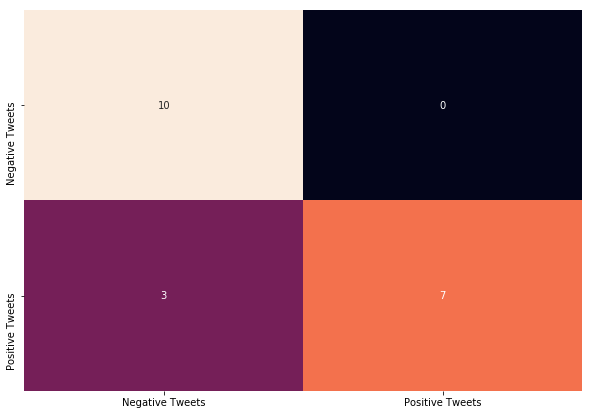

In [0]:
df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative Tweets", "Positive Tweets"]],
columns = [i for i in ["Negative Tweets", "Positive Tweets"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")
plt.savefig('confusion_matrix_ujicoba.jpg')

##Visualisasi Bernoulli Predict di Web

In [0]:
df_pred = pd.read_csv('/content/gdrive/My Drive/skripsi2019/prepro/predict.csv', index_col=0)

In [0]:
# df_pred['sentimen'] = df_pred['prediksi']
# df_pred.head(20)

In [0]:
df_pred['sentimen'] = ['positive' if i == 1 else 'negative' for i in df_pred['sentimen']]
df_pred['prediksi'] = ['positive' if i == 1 else 'negative' for i in df_pred['prediksi']]
df_pred.head(20)

,clean_text,positive,negative,sentimen,prediksi
tweets,,,,,
KEBIASAAN BANGET SIH ANNOUNCER BOJONGGEDE ENGGAk NGASIH TAU KERETA YANG DATANG BERAPA RANGKAIAN?!! SESUSAH ITU YA CUMA NGASIH TAU DOANG T*I BAT CAPE ORG LARI-LARI @CommuterLine @CurhatKRL,biasa banget sih announcer bojonggede enggak n...,0.035714,0.178571,negative,negative
Baru bangun di krl dong nyaman bgt aku tuh tidur di krl gini adem gmn gtu sampe pgn bawa guling,baru bangun krl dong nyaman bgt tuh tidur krl ...,0.176471,0.000000,positive,positive
krl ketahan nih masuk manggarai,krl tahan nih masuk manggarai,0.000000,0.200000,negative,negative
"@CommuterLine min, ini krl bekasi knp telat ya? Td pagi jg, apa double double track nya ga ngaruh ya... https://t.co/DbYJK3oyVm",commuterline min krl bekas knp telat ya td pag...,0.000000,0.181818,negative,negative
@CommuterLine min kenapa kereta tangerang panas bgt ya. Kayaknya AC nya gak dingin deh. No 8510 k1 1 89 64,commuterline min kereta tangerang panas bgt ya...,0.157895,0.157895,positive,negative
"Naik krl pagi jam setengah 6 tuh nikmat bgt liat pemandangan stasiun-stasiun. Mana warna langit nya lagi bagus gtu, jd keliatan estetik stasiun nya kaya preset2 lightroom wkwkwk",naik krl pagi jam tengah 6 tuh nikmat bgt liat...,0.148148,0.000000,positive,positive
ketahan gambir menit ketahan masuk jatinegara udah menit masih lanjut duhh udah bisa ngomong apa lah ama org ngatur jadwal krl,tahan gambir menit tahan masuk jatinegara udah...,0.052632,0.157895,negative,negative
bau ketek di krl aduh pusing jadi mual,bau ketek krl aduh pusing jadi mual,0.000000,0.428571,negative,negative
Ya mudah2an nggak ada apa2 seterusnya spt ini biar KRL lbh nyaman manusiawi #krlhariini,ya mudah2an ada apa2 spt biar krl lbh nyaman m...,0.272727,0.000000,positive,positive


In [0]:
df_pred.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/bernoulliweb.csv')

#Visualisasi Web

In [0]:
#Raw Data
df = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/data_tweetscoba.csv')
#Casefolding
df['casefolding'] = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/casefolding_tweets.csv')
df['filtering'] = pd.read_csv('gdrive/My Drive/skripsi2019/prepro/filtering_tweets.csv') 
df.head()


,tweets,casefolding,filtering
0,gangguan double double track toh KRL. dan aku ...,gangguan double double track toh krl. dan aku ...,gangguan double double track toh krl dan aku m...
1,@CommuterLine min tolong ac panas di krl 204-4...,@commuterline min tolong ac panas di krl 204-4...,min tolong ac panas di krl 204 48 k 1 19164 ju...
2,@CommuterLine jangan menghambat perjalanan yan...,@commuterline jangan menghambat perjalanan yan...,jangan menghambat perjalanan yang enggak jelas...
3,"@CommuterLine jaman sudah maju, teknologi suda...","@commuterline jaman sudah maju, teknologi suda...",jaman sudah maju teknologi sudah berkembang na...
4,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar ya lagi ketahan di manggara...,dijalan nih bentar ya lagi ketahan di manggara...


In [0]:
df.to_csv('/content/gdrive/My Drive/skripsi2019/prepro/preprocess.csv', index=None)